# W9 - October 20 - Seaborn: Plotting with DataFrames

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Plotting with `pandas` is no different than plotting with `numpy`**.

In [2]:
import numpy as np
from scipy.constants import g

# Create numpy arrays
angles = np.arange(0, 181)
t = 2 * np.sin(np.radians(angles)) / g
h = np.sin(np.radians(angles)) ** 2 / (2 * g)
d = np.sin(2 * np.radians(angles)) / g

df_projectile = pd.DataFrame({"Angles": angles,
                              "Time of Flight": t,
                              "Maximum Height": h,
                              "Range": d})
df_projectile.set_index("Angles", inplace=True)  # inplace keyword is important. Without it, a new DataFrame is created.
df_projectile

,Time of Flight,Maximum Height,Range
Angles,,,
0,0.000000e+00,0.000000e+00,0.000000e+00
1,3.559300e-03,1.552959e-05,3.558758e-03
2,7.117517e-03,6.209944e-05,7.113181e-03
3,1.067356e-02,1.396528e-04,1.065894e-02
4,1.422636e-02,2.480952e-04,1.419171e-02
...,...,...,...
176,1.422636e-02,2.480952e-04,-1.419171e-02
177,1.067356e-02,1.396528e-04,-1.065894e-02
178,7.117517e-03,6.209944e-05,-7.113181e-03


You can pass any of the DataFrame columns as `x` and `y`.

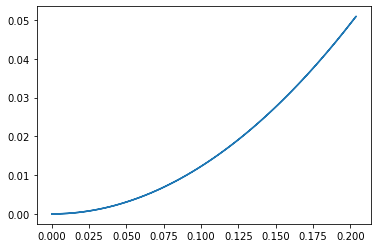

In [3]:
plt.plot(df_projectile["Time of Flight"], df_projectile["Maximum Height"]);

Use `df.index` to pass the index as one of the plot variables.

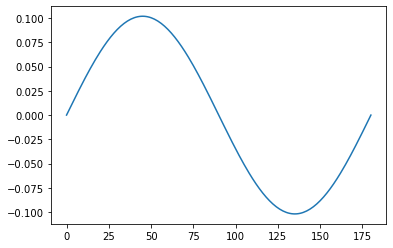

In [4]:
plt.plot(df_projectile.index, df_projectile["Range"]);

**DataFrames also have a convenient `.plot()` method, which plots all the columns vs the index.**

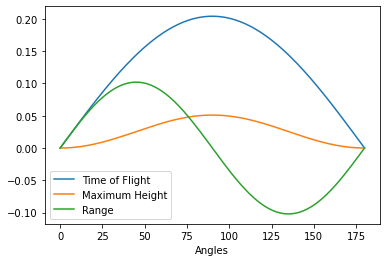

In [5]:
df_projectile.plot();

# Seaborn

Seaborn is a third-party library (not in the Standard Libraray), included with the Anaconda Distribution. Hence, you don't need to install it in the default Anaconda environment (`base`).

**Why use Seaborn?**

`seaborn` is based on matplotlib, and provides a *high-level interface* for drawing attractive and informative statistical graphics.

***Important:* You do not always have to use `seaborn` while plotting `pandas` DataFrames. In many cases, `matplotlib` is the better option. Use `seaborn` for its features, as we will see in the class today.** 

![seaborn plotting functions](https://seaborn.pydata.org/_images/function_overview_8_0.png)

https://seaborn.pydata.org/

In [6]:
import seaborn as sns

`sns` is the conventional alias for `seaborn`.

`seaborn` also includes some example datasets, and we will be using them for this class.

In [7]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [8]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


### Long-form vs wide-form data

Seaborn accepts data sets that have more than one vector organized in some tabular fashion. There is a fundamental distinction between “long-form” and “wide-form” data tables, and seaborn will treat each differently.

Generally, it is preferred to have data in **long-form** for computation, where
- Each variable is a column
- Each observation is a row

However, for simple data without only a couple of variables, **wide-form** may be easier to read since it looks like a spreadsheet.
- First variable is a row
- Second variable is a column

![data form](https://seaborn.pydata.org/_images/data_structure_19_0.png)

More information can be found here:
https://seaborn.pydata.org/tutorial/data_structure.html

**It is possible to `pivot()` from long-form to wide-form data, by selecting the variables.**

In [9]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


When only the DataFrame is passed without specifying `x` and `y`, `seaborn` assumes it is wide-form data.

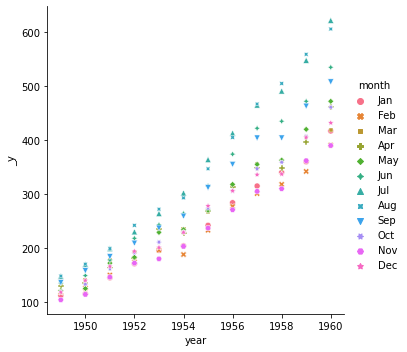

In [10]:
sns.relplot(data=flights_wide);

While wide-form may seem convenient in such a case, and more familiar as you're used to seeing spreadsheets, long-form is the preferred format for computation. This is because Python is "looking" at your data, not you.

Additionally, once you have the data in the correct format in long-form, you no longer need to think about its structure. You can design your plots by thinking only about the variables contained within it. 

***For the remainder of this class, and for most of this course, we will be using long-form data.***

## Visualizing statistical relationships

In [11]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


For `seaborn` plotting functions, the DataFrame is passed using the `data` keyword argument, and then `x` and `y` is specified as the name of the columns.

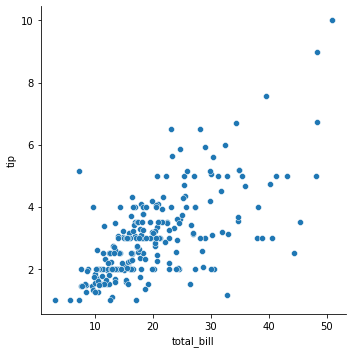

In [12]:
sns.relplot(data=tips, x="total_bill", y="tip");

Additional variables (DataFrame columns) can be passsed as well to set the `hue`, `style`, and `size` of the markers.

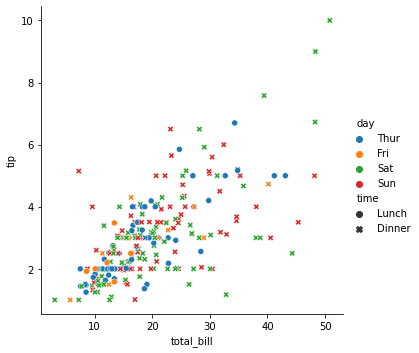

In [13]:
sns.relplot(data=tips, x="total_bill", y="tip",
            hue="day", style="time");

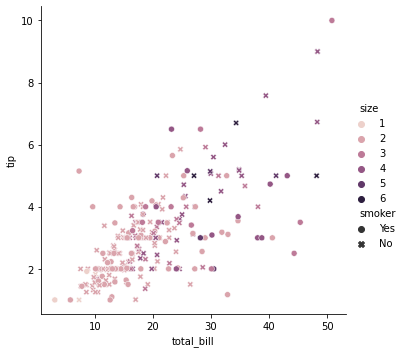

In [14]:
sns.relplot(data=tips, x="total_bill", y="tip",
            hue="size", style="smoker");

By default, a discrete color palette is used for categorical variables, and a continous color palette is used for numerical variables.

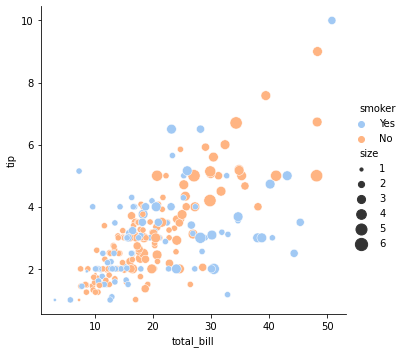

In [15]:
sns.relplot(data=tips, x="total_bill", y="tip",
            size="size", sizes=(10, 150),
            hue="smoker", palette="pastel");

### Continuous plots

`kind="line"` specifies that a line plot is needed.

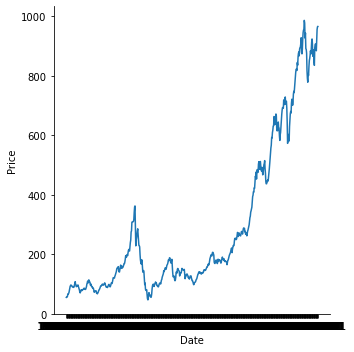

In [16]:
dowjones = sns.load_dataset("dowjones")
sns.relplot(data=dowjones, x="Date", y="Price", kind="line");  # kind specifies the type of plot

In [17]:
fmri = sns.load_dataset("fmri")
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


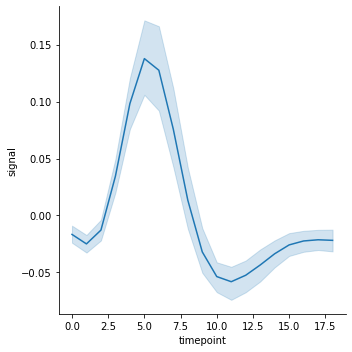

In [18]:
sns.relplot(data=fmri, kind="line",
            x="timepoint", y="signal");

The `errorbar` can be set to use
- `"ci"`: 95% confidence interval (default)
- `"pi"`: 95% percentile interval
- `"sd"`: Standard deviation
- `"se"`: Standard Error
- `None`

Line plots also have additional options like `hue`, `style`, `dashes`, `markers`, etc.

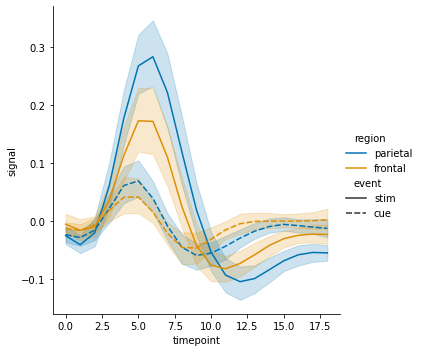

In [19]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    hue="region", style="event", palette="colorblind",
);

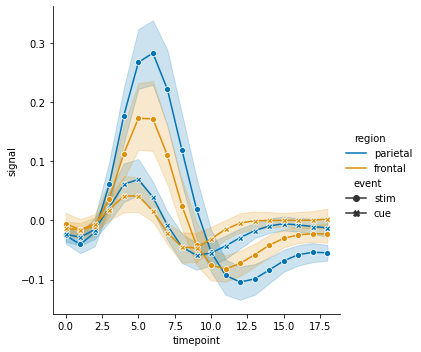

In [20]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    hue="region", style="event", palette="colorblind",
    dashes=False, markers=True,
);

## Visualizing distributions

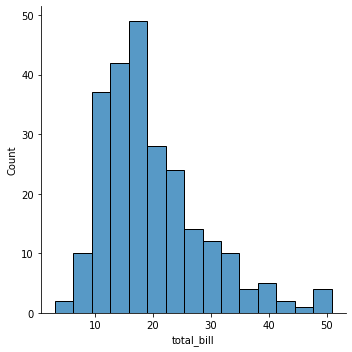

In [21]:
sns.displot(tips, x="total_bill", bins=15);

Histograms can be created for categorical data as well.

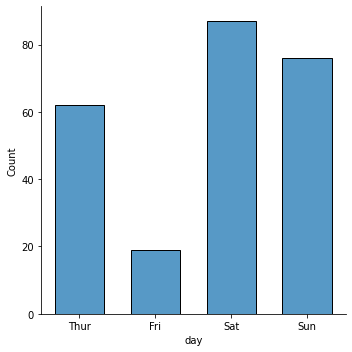

In [22]:
sns.displot(tips, x="day", shrink=0.65);  # shrink is used to create space between the bars

As with the previous plots, `hue` can be added.

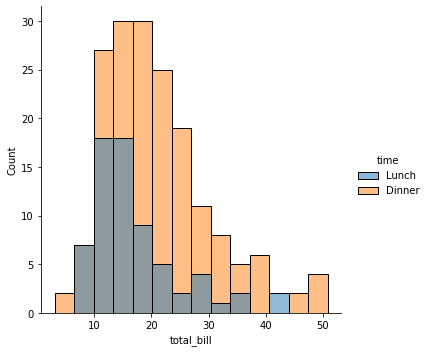

In [23]:
sns.displot(tips, x="total_bill", hue="time");

A "step plot" can be used to make is easier to visualize distributions that overlap.

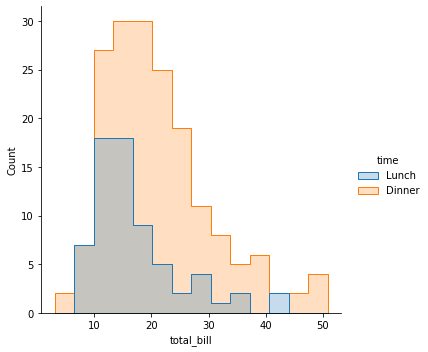

In [24]:
sns.displot(tips, x="total_bill", hue="time", element="step");

But it can get messy with multiple values

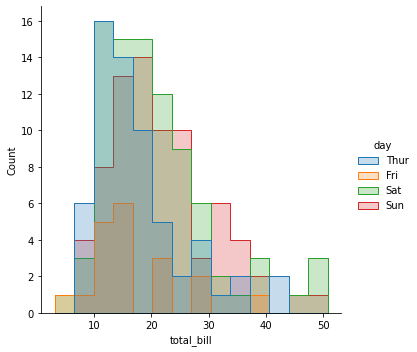

In [25]:
sns.displot(tips, x="total_bill", hue="day", element="step");

Stacking the bars can be useful in this case

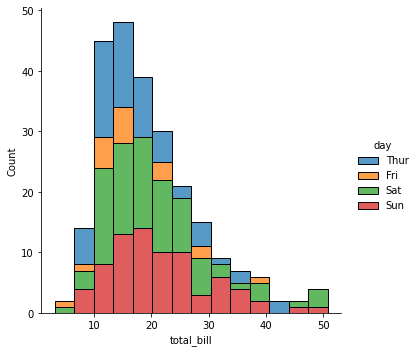

In [26]:
sns.displot(tips, x="total_bill", hue="day", multiple="stack");

Another option is to have them side-by-side

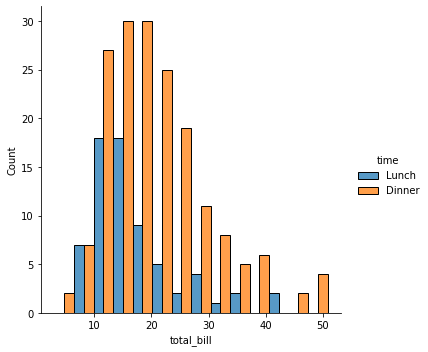

In [27]:
sns.displot(tips, x="total_bill", hue="time", multiple="dodge");

**Normalizing histograms**

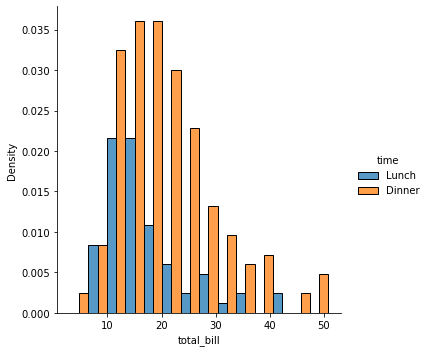

In [28]:
sns.displot(tips, x="total_bill", hue="time", multiple="dodge", stat="density");

By default, however, the normalization is applied to the entire distribution, so this simply rescales the height of the bars. By setting `common_norm=False`, each subset will be normalized independently.

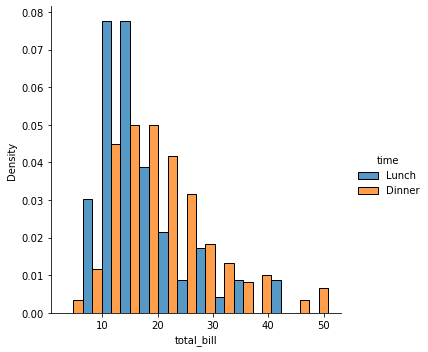

In [29]:
sns.displot(tips, x="total_bill", hue="time", multiple="dodge", stat="density", common_norm=False);

### Smooth distributions

Rather than using discrete bins, Kernel density estimation (KDE) smooths the observations with a Gaussian kernel, producing a continuous density estimate.

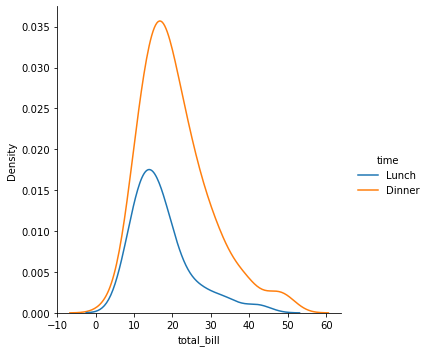

In [30]:
sns.displot(tips, kind="kde", x="total_bill", hue="time");

A `fill` can be added

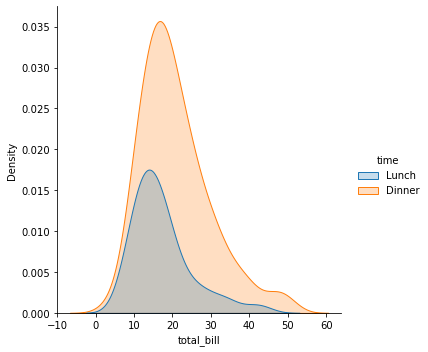

In [31]:
sns.displot(tips, kind="kde", x="total_bill", hue="time", fill=True);

Again, for multiple plots, stacking is often the better option.

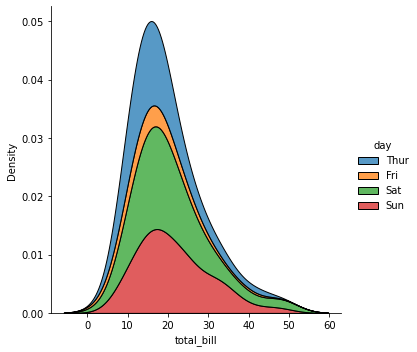

In [32]:
sns.displot(tips, kind="kde", x="total_bill", hue="day", multiple="stack");

**Cumulative distributions**

ECDF: Empirical Cumulative Distribution Function

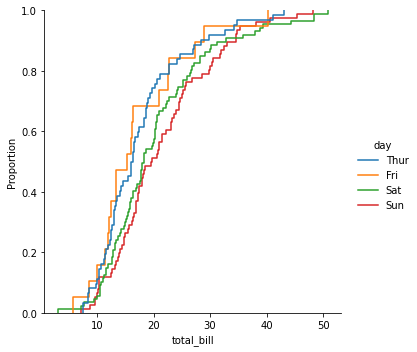

In [33]:
sns.displot(tips, kind="ecdf", x="total_bill", hue="day");

### 2D distributions

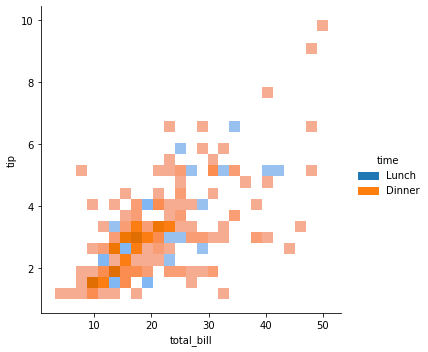

In [34]:
sns.displot(tips, x="total_bill", y="tip", hue="time", bins=(25, 25));

A colorbar (`cbar`) can be added to aid the interpretation

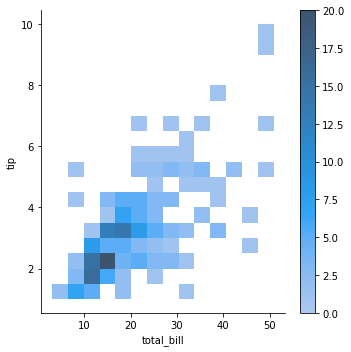

In [35]:
sns.displot(tips, x="total_bill", y="tip", cbar=True);

KDE can be used to show the contours of the data.

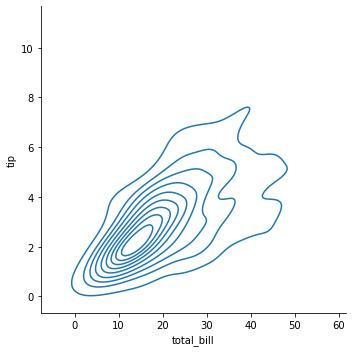

In [36]:
sns.displot(tips, x="total_bill", y="tip", kind="kde");

## Visualizing categorical data

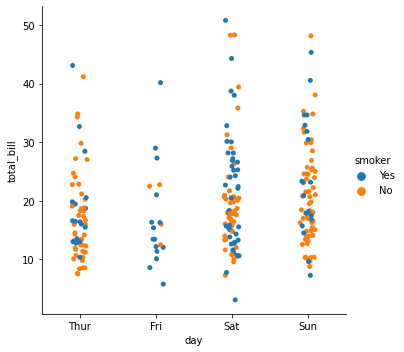

In [37]:
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker");

By default the plot is jittered for better visualization, but you can turn that off.

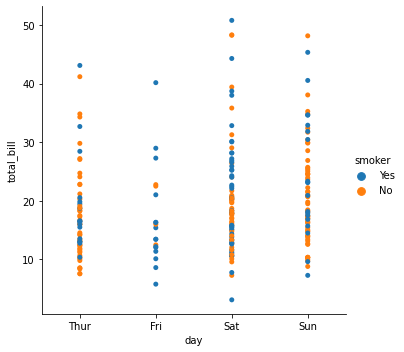

In [38]:
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker", jitter=False);

Another option is a swarm plot.

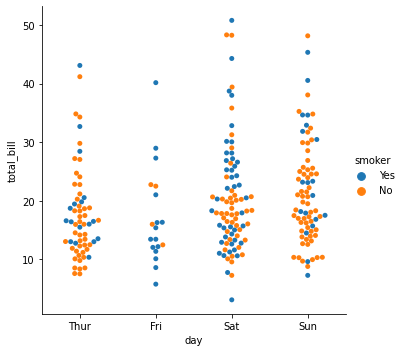

In [39]:
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker", kind="swarm");

### Comparing distributions

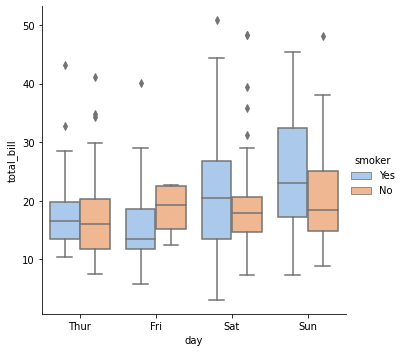

In [40]:
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker",
            kind="box", palette="pastel");

We're all familiar with the box plot above, but let's look at some more options

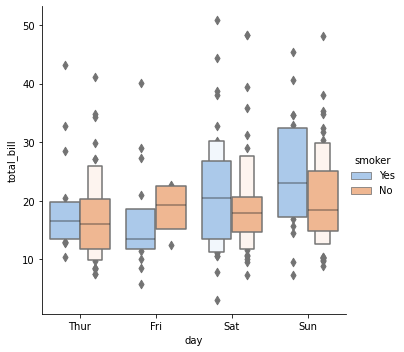

In [41]:
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker",
            kind="boxen", palette="pastel");

A violin plot combines the box plot with KDE.

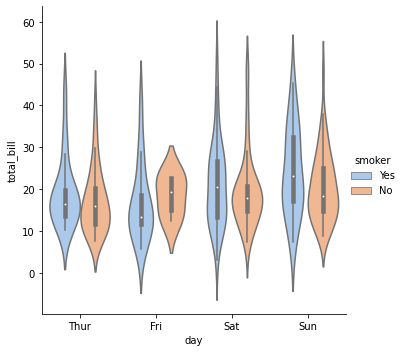

In [42]:
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker",
            kind="violin", palette="pastel");

For a more efficient use of space, violin plots can be `split`.

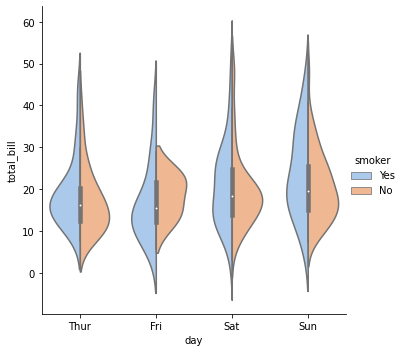

In [43]:
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker",
            kind="violin", palette="pastel", split=True);

And finally, individual data points can be shown inside the violin as lines.

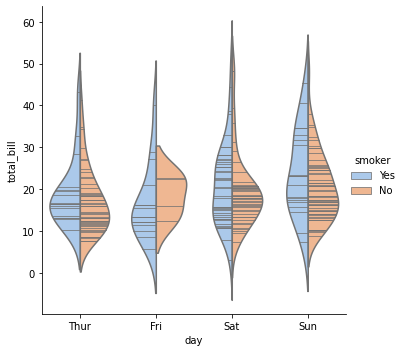

In [44]:
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker",
            kind="violin", palette="pastel", split=True, inner="stick");

**Estimating central tendency**

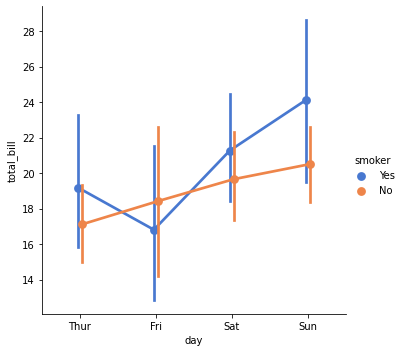

In [45]:
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker",
            kind="point", palette="muted", dodge=True);

## Other useful plots

### Joint plots

Combines scatterplots and histograms

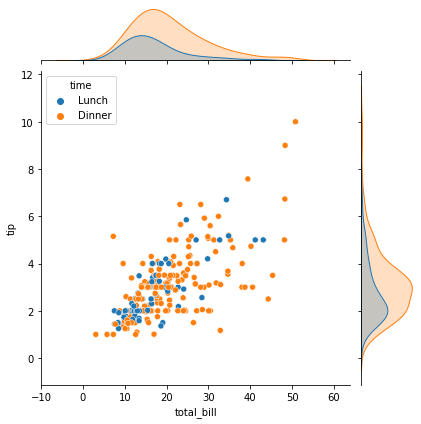

In [46]:
sns.jointplot(data=tips, x="total_bill", y="tip", hue="time");

and can be used with KDEs as well.

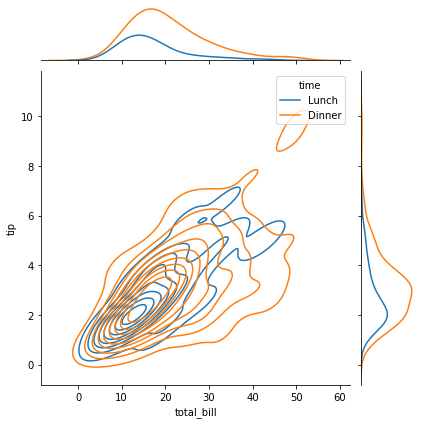

In [47]:
sns.jointplot(data=tips, x="total_bill", y="tip", hue="time", kind="kde");

### Multi-plot grids

The `FacetGrid` class is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset.

A `FacetGrid` can be drawn with up to three dimensions: `row`, `col`, and `hue`.

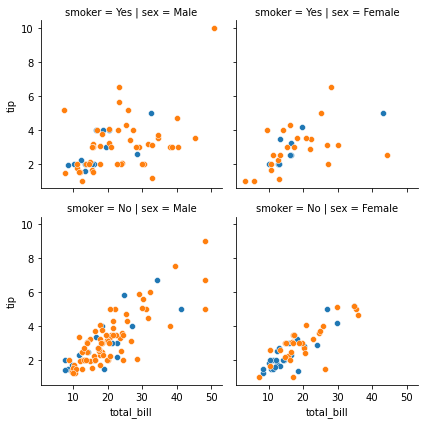

In [48]:
g = sns.FacetGrid(tips, row="smoker", col="sex", hue="time")
g.map(sns.scatterplot, "total_bill", "tip");

### Pair plots

The `pairplot()` function offers a similar blend of distributions. Rather than focusing on a single relationship, however, pairplot() uses a “small-multiple” approach to visualize the univariate distribution of all numerical variables in a dataset along with all of their pairwise relationships.

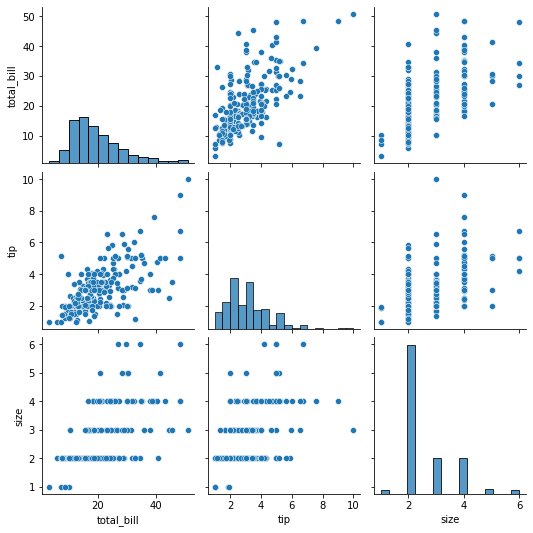

In [49]:
sns.pairplot(tips);

It can be customized using the `PairGrid` object.

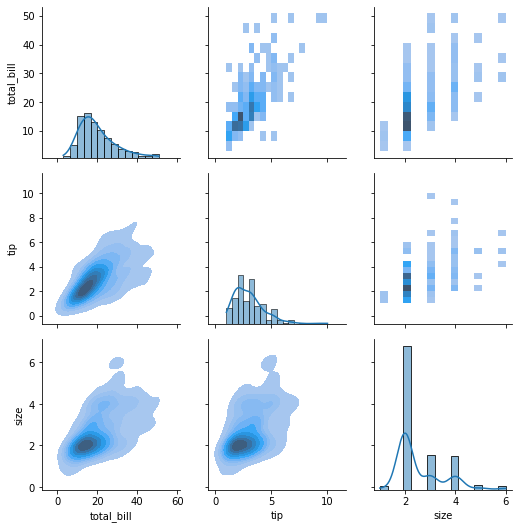

In [50]:
g = sns.PairGrid(tips)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True);

## Controlling figure aesthetics

`seaborn` has a few inbuilt styles, that can be used based on the application and personal preferences.

You can set the style for all the plots in your script/notebook using `sns.set_style()`.

In [51]:
styles = ["darkgrid", "whitegrid", "dark", "white", "ticks"]

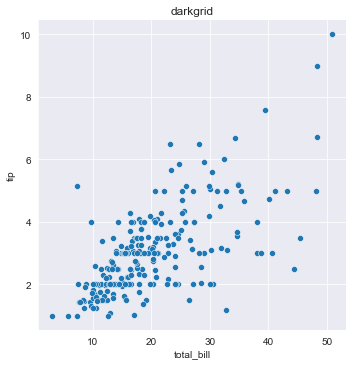

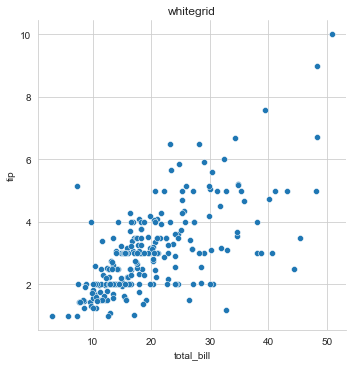

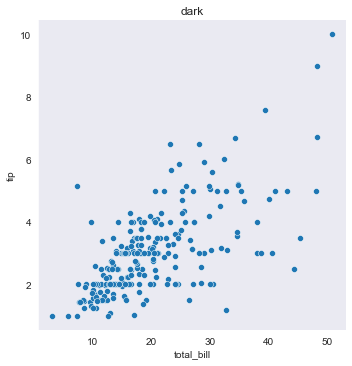

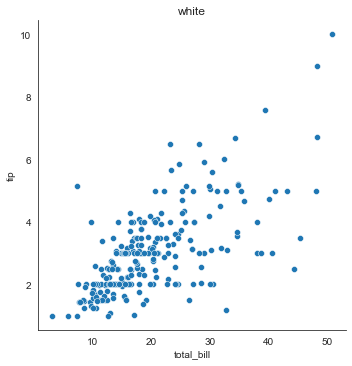

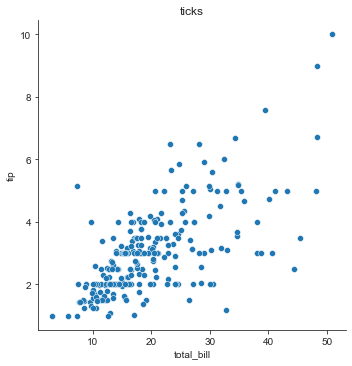

In [52]:
for style in styles:
    sns.set_style(style)
    sns.relplot(data=tips, x="total_bill", y="tip").set(title=style);

**Plots can be scaled for different contexts easily** using `sns.set_context`. The default context is `"notebook"`.

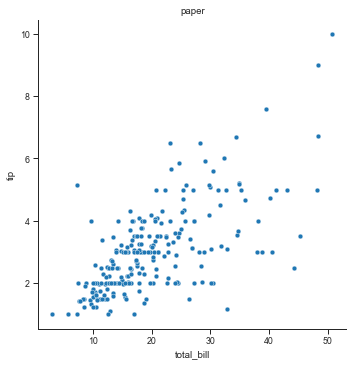

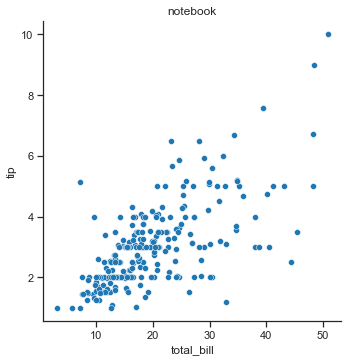

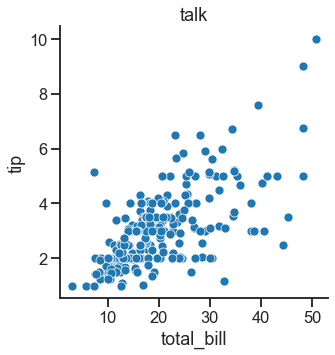

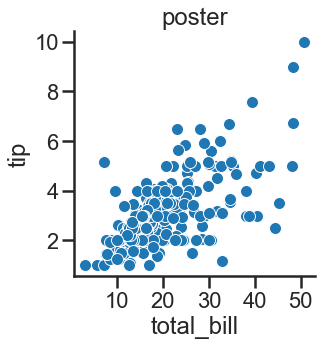

In [53]:
contexts = ["paper", "notebook", "talk", "poster"]
for context in contexts:
    sns.set_context(context)
    sns.relplot(data=tips, x="total_bill", y="tip").set(title=context);
sns.set_context("notebook")  # setting back to default

**The `seaborn` theme can also be used to change the aesthetics of all future `matplotlib` plots in the script/notebook.**

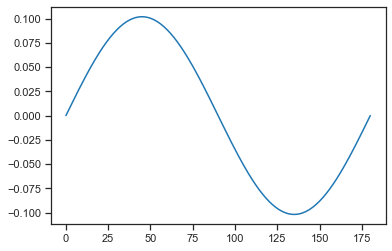

In [54]:
plt.plot(df_projectile.index, df_projectile["Range"]);

Once you use `sns.set_theme()`, all the future plots will have `seaborn`'s deafult `darkgrid` style. This will overwrite any style and you have set, and reset it to the `darkgrid` and `notebook` defaults.

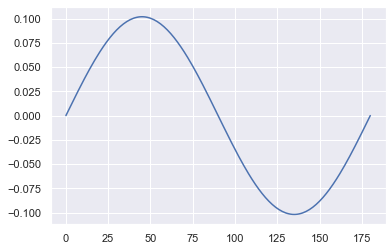

In [55]:
sns.set_theme()
plt.plot(df_projectile.index, df_projectile["Range"]);

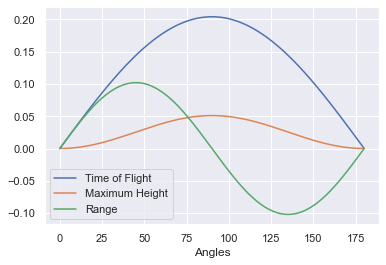

In [56]:
df_projectile.plot();